# cluster annotation

In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np


sc.logging.print_header()

adata = sc.read_h5ad('../nbl(UQlabel).h5ad')###after re-annotation

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.2 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


# Selecting immune cells and re-annotation 

In [3]:
adata

AnnData object with n_obs × n_vars = 165813 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'n

In [27]:
# Compute UMAP
sc.tl.umap(adata)

# The UMAP coordinates will be stored in adata.obsm['X_umap']

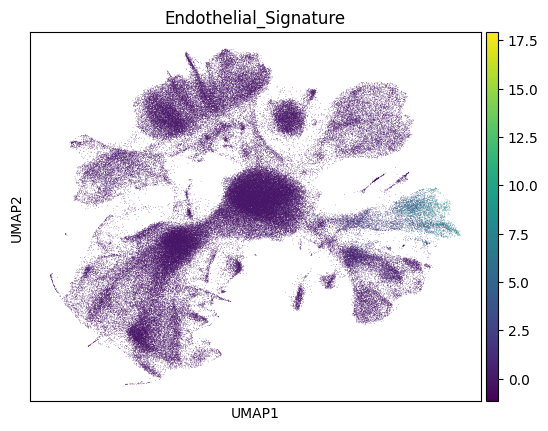

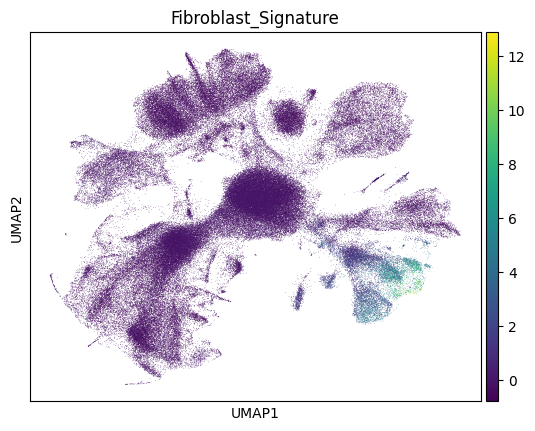

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


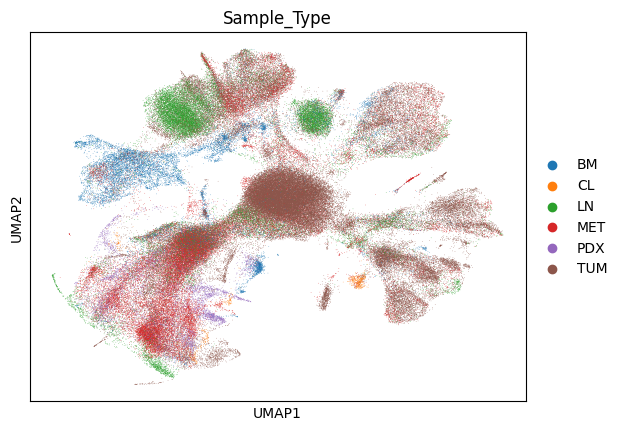

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


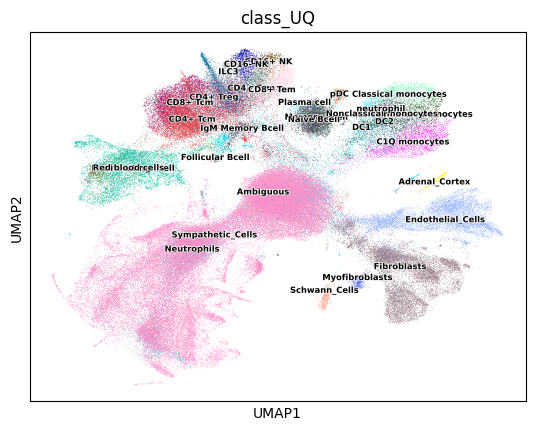

In [28]:
# Now you can plot using the umap() function:
sc.pl.umap(adata, color=['Endothelial_Signature'])
sc.pl.umap(adata, color=['Fibroblast_Signature'])
sc.pl.umap(adata, color=['Sample_Type'])
sc.pl.umap(adata, color=['class_UQ'], legend_fontsize="6", legend_fontoutline=1, legend_loc='on data')


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


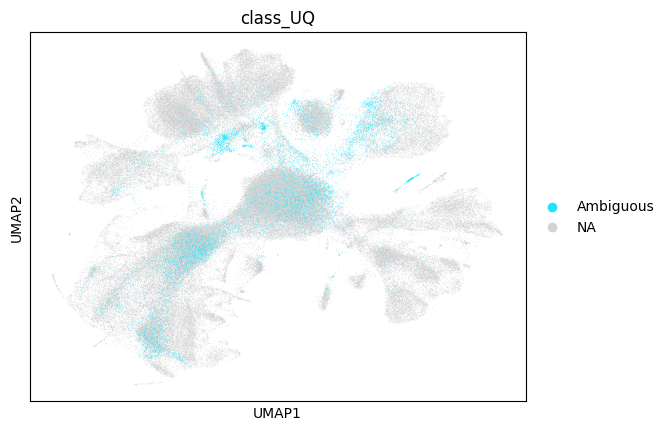

In [6]:
sc.pl.umap(adata, color=['class_UQ'], groups = "Ambiguous")


In [7]:
adata.obs.class_UQ.cat.categories

Index(['Adrenal_Cortex', 'Ambiguous', 'C1Q monocytes', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ Treg', 'CD8+ Tcm', 'CD8+ Tem', 'CD16+ NK', 'CD16- NK',
       'Classical monocytes', 'DC1', 'DC2', 'Endothelial_Cells', 'Fibroblasts',
       'Follicular Bcell', 'ILC3', 'IgM Memory Bcell',
       'Intermediate monocytes', 'Memory Bcell', 'Myofibroblasts',
       'Naive Bcell', 'Neutrophils', 'Nonclassical monocytes', 'Plasma cell',
       'Proliferating Tcell', 'Red blood cells', 'Schwann_Cells',
       'Sympathetic_Cells', 'neutrophil', 'pDC'],
      dtype='object')

# subsetting unknown endothelial cells for further annotation

In [19]:
##edata for all kinds of endothelial cells
edata=adata[(adata.obs['class_UQ'].isin(['Endothelial_Cells']))].copy()
edata

AnnData object with n_obs × n_vars = 7064 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFe

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


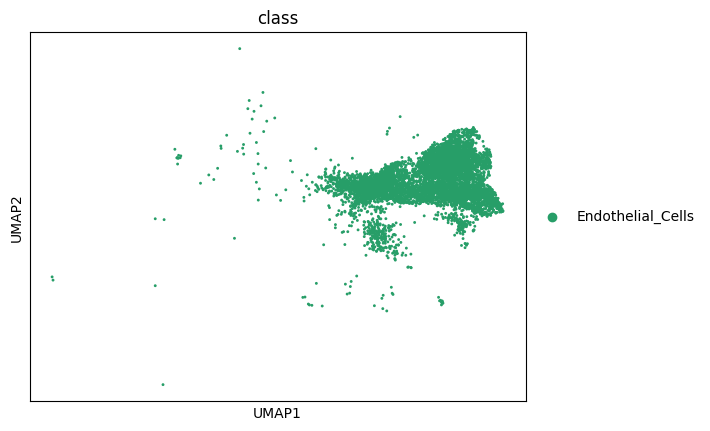

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


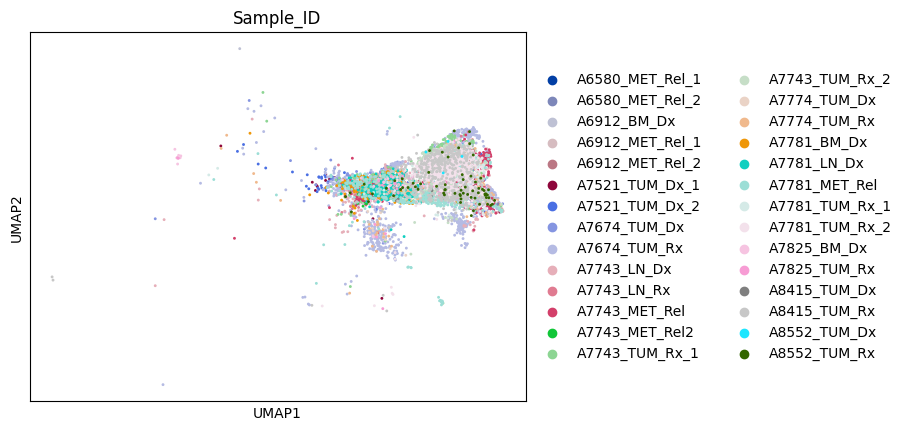

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


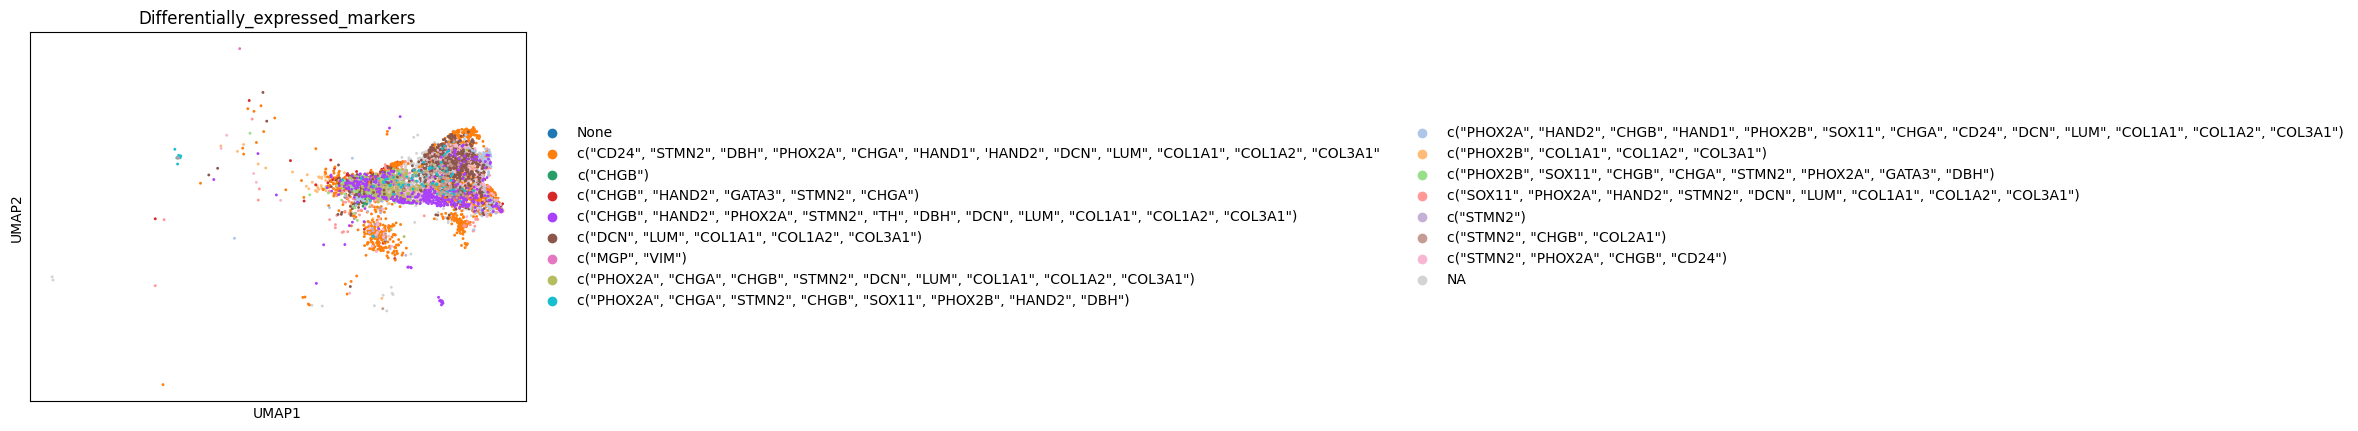

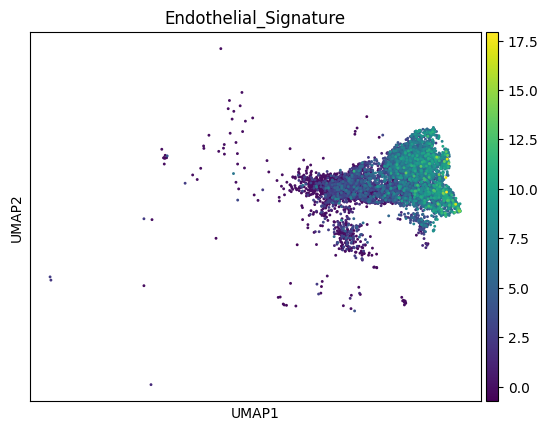

In [20]:
sc.pl.umap(edata, color=['class'])
sc.pl.umap(edata, color=['Sample_ID'])
sc.pl.umap(edata, color=['Differentially_expressed_markers'])
sc.pl.umap(edata, color = ['Endothelial_Signature'])

In [21]:
#using numpy

np.max(edata.X)

8.308538

In [22]:
np.min(edata.X)

0.0

In [23]:
edata

AnnData object with n_obs × n_vars = 7064 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFe

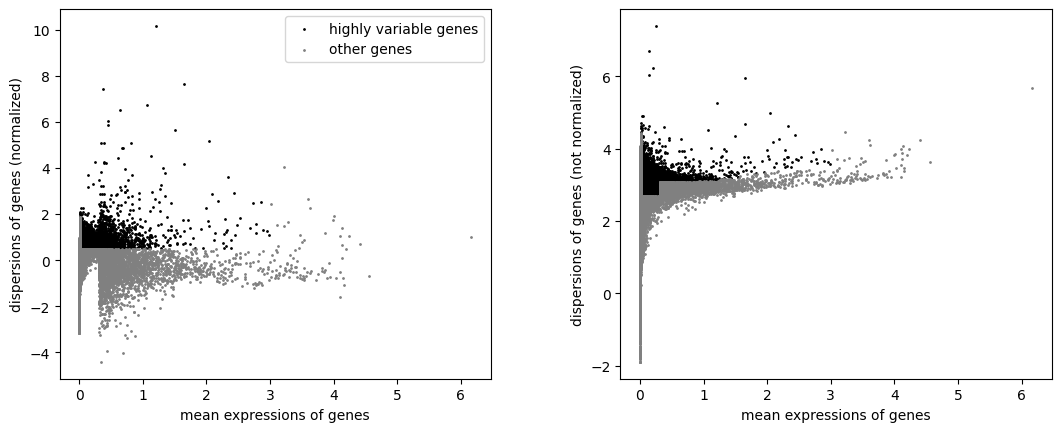

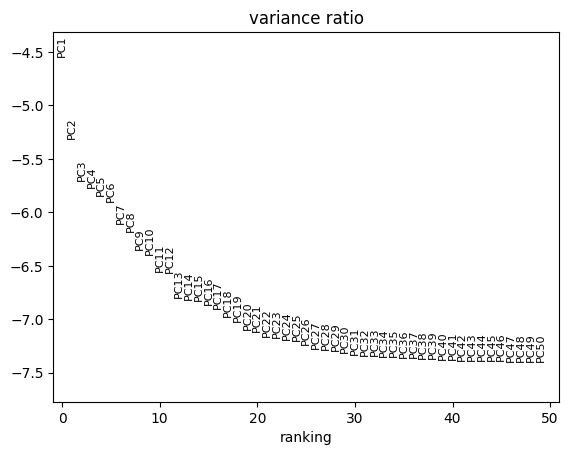

2023-07-14 15:57:23,733 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-14 15:57:28,579 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-14 15:57:28,625 - harmonypy - INFO - Iteration 1 of 10
2023-07-14 15:57:30,048 - harmonypy - INFO - Iteration 2 of 10
2023-07-14 15:57:31,607 - harmonypy - INFO - Iteration 3 of 10
2023-07-14 15:57:33,100 - harmonypy - INFO - Iteration 4 of 10
2023-07-14 15:57:34,474 - harmonypy - INFO - Iteration 5 of 10
2023-07-14 15:57:35,839 - harmonypy - INFO - Iteration 6 of 10
2023-07-14 15:57:36,881 - harmonypy - INFO - Iteration 7 of 10
2023-07-14 15:57:38,478 - harmonypy - INFO - Iteration 8 of 10
2023-07-14 15:57:39,728 - harmonypy - INFO - Iteration 9 of 10
2023-07-14 15:57:40,528 - harmonypy - INFO - Converged after 9 iterations


In [24]:
try:
    edata.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(edata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(edata)
edata.raw = edata
edata = edata[:, edata.var.highly_variable]
sc.pp.regress_out(edata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(edata, max_value=10)
sc.tl.pca(edata, svd_solver='arpack')
sc.pl.pca_variance_ratio(edata, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(edata, key="Sample_ID")
sc.pp.neighbors(edata,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(edata, min_dist = 0.3)

In [14]:
edata.write('endothelial_subset01.h5ad', compression = 'gzip')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


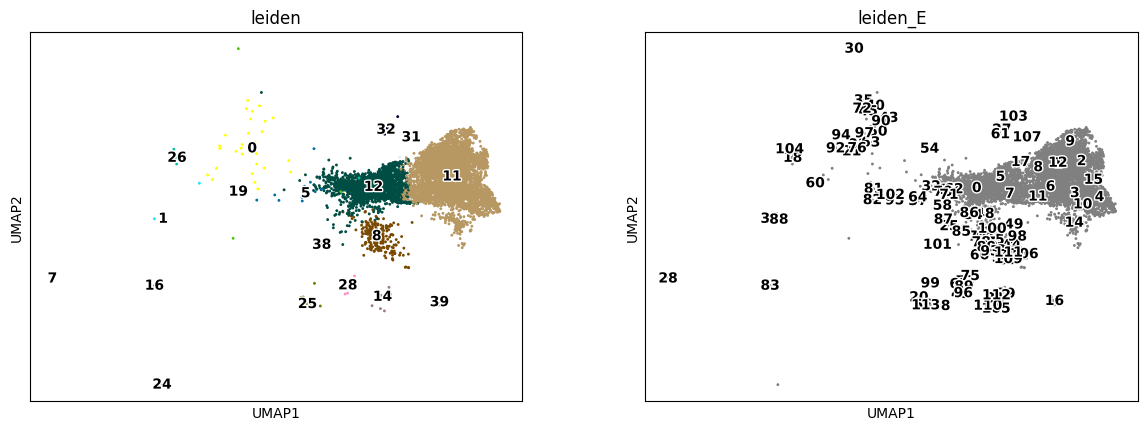

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


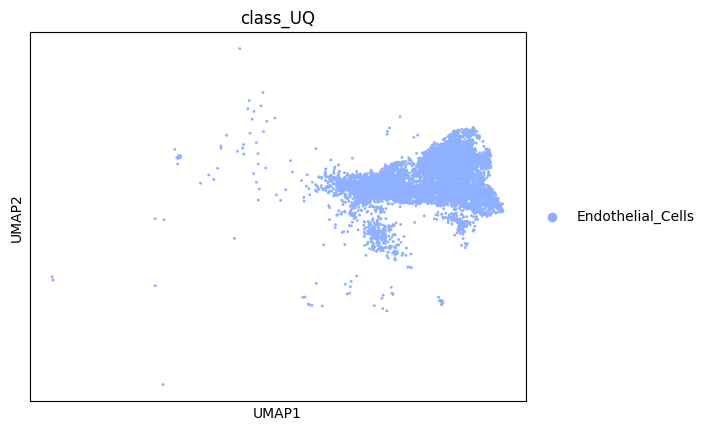

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


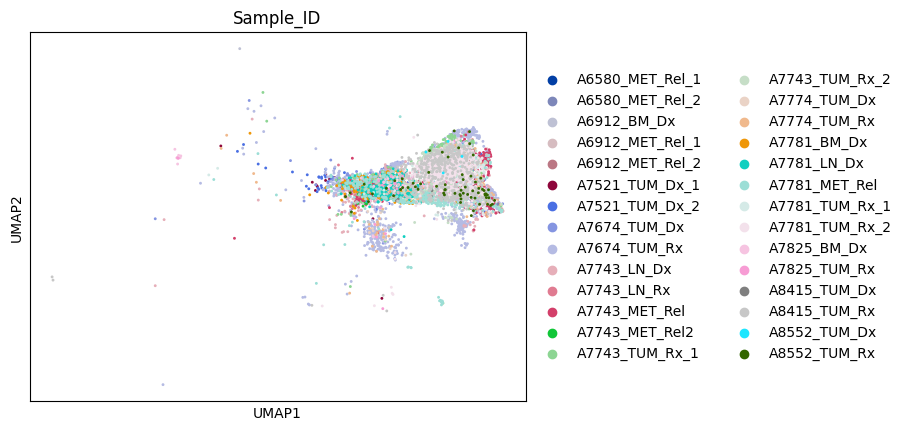

In [15]:
sc.tl.leiden(edata, key_added = "leiden_E")
sc.pl.umap(edata, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(edata, color=['class_UQ'])
sc.pl.umap(edata, color=['Sample_ID'])

In [ ]:
# just for quick check of gene expression of some cell type markers
#sc.pl.umap(edata,color=['FCGR3B','MS4A1'])

In [25]:
sc.tl.rank_genes_groups(edata,groupby='leiden_E', method='wilcoxon')

KeyError: 'leiden_E'

In [26]:
sc.pl.rank_genes_groups_dotplot(edata,n_genes=10,min_logfoldchange=0.5,standard_scale='var',color_map='viridis')

KeyError: 'names'

In [ ]:
marker_dict={'T cell':['CD3D','CD44'],
'Neutrophil':['FCGR3B','S100A9'],
'Endothelial':['PECAM1','IGFBP2'],
'Proliferating Endothelial':['MKI67','STMN1'],
'Venous Endothelial':['LEFTY1','EPHB4','ACKR1'],
'Arterial Endothelial':['CXCL12','EPHB2'],
'Lymphatic Endothelial':['LYVE1','ACKR4','MADCAM1','ITGA2B']}
sc.pl.dotplot(edata, marker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [ ]:
##sc.tl.leiden(edata,restrict_to=('leiden_E',['12']),key_added='leiden_E_R',resolution=0.3)
##sc.pl.umap(edata,color=['leiden_E','leiden_E_R'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
#sc.tl.rank_genes_groups(edata,groupby='leiden_E_R', method='wilcoxon')

In [ ]:
#sc.pl.rank_genes_groups_dotplot(edata,n_genes=10,min_logfoldchange=0.5,standard_scale='var',color_map='viridis')

In [ ]:
#sc.pl.dotplot(edata, marker_dict, groupby='leiden_E_R', 
              #standard_scale='var',color_map='Blues')

In [ ]:
#To map the identified clusters to a cell type annotation label

endocellannot= {
    '0':'Ambiguous',
    '1':'Arterial Endothelial',
    '2':'Endothelial',
    '3':'Endothelial',
    '4':'Endothelial',
    '5':'Endothelial',
    '6':'Ambiguous',
    '7':'Arterial Endothelial',
    '8':'Ambiguous',
    '9':'Lymphatic Endothelial',
    '10':'Ambiguous',
    '11':'Endothelial',
    '12':'Endothelial',
    '13':'Ambiguous',
    '14':'Ambiguous',
    '15':'Proliferating Endothelial',
    '16':'Endothelial',
    '17':'Ambiguous', 
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
edata.obs['cell type'] = edata.obs['leiden_E'].map(endocellannot).astype('category')

In [ ]:
sc.pl.dotplot(edata, marker_dict,'cell type')

In [ ]:
sc.pl.umap(edata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

In [ ]:
## do this projection after clusters have cleaned up
adata.obs['class_UQ_2'] = adata.obs['class_UQ'] # create a new column
adata.obs['class_UQ_2'] = adata.obs['class_UQ_2'].astype(str) # convert to str
adata.obs['class_UQ_2'].update(edata.obs['cell type'])
sc.pl.umap(adata,color='class_UQ_2')

In [ ]:
edata2=edata[edata.obs['cell type'].isin(['Endothelial','Arterial Endothelial','Lymphatic Endothelial','Proliferating Endothelial'])].copy()
sc.pl.umap(edata2,color='cell type')

In [ ]:
edata2=edata2.raw.to_adata()
edata2

In [ ]:
# compute hierarchical clustering using PCs (several distance metrics and linkage methods are available).
sc.tl.dendrogram(edata2, 'cell type')

In [ ]:
ax2 = sc.pl.dendrogram(edata2, 'cell type')

In [ ]:
ax2 = sc.pl.correlation_matrix(edata2, 'cell type', figsize=(5,3.5))

# Repeat everything from the start to clean up the endothelial clusters

In [ ]:
sc.tl.umap(edata2)

In [ ]:
sc.pl.umap(edata2, color=['leiden_E'], legend_fontsize="6", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(edata2, color=['Sample_Type'])

In [ ]:
sc.pl.umap(edata2, color=['Sample_ID'])
sc.pl.umap(edata2, color=['Differentially_expressed_markers'])

In [ ]:
np.max(edata2.X)

In [ ]:
np.min(edata2.X)

In [ ]:
try:
    edata2.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(edata2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(edata2)
edata2.raw = edata2
edata2 = edata2[:, edata2.var.highly_variable]
sc.pp.regress_out(edata2, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(edata2, max_value=10)
sc.tl.pca(edata2, svd_solver='arpack')
sc.pl.pca_variance_ratio(edata2, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(edata2, key="Sample_ID")
sc.pp.neighbors(edata2,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(edata2, min_dist = 0.3)

In [ ]:
edata2.write('endothelial_subset02.h5ad')

In [ ]:
sc.tl.leiden(edata2, key_added = "leiden_E") #resolution can be changed
sc.pl.umap(edata2, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(edata2, color=['Sample_ID'])

In [ ]:
sc.tl.rank_genes_groups(edata2,groupby='leiden_E', method='wilcoxon')

In [ ]:
sc.tl.dendrogram(edata2,groupby='leiden_E')
sc.pl.dendrogram(edata2,groupby='leiden_E')

In [ ]:
sc.pl.rank_genes_groups_dotplot(edata2,n_genes=5,min_logfoldchange=0.5, standard_scale='var',color_map='viridis')

In [ ]:
sc.pl.dotplot(edata2, marker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

# however not fully convinced by venous EC marker at this point

In [ ]:
#To map the identified clusters to a cell type annotation label

endocellannot2= {
    '0':'Ambiguous',
    '1':'Arterial Endothelial',
    '2':'Endothelial',
    '3':'Endothelial',
    '4':'Endothelial',
    '5':'Endothelial',
    '6':'Arterial Endothelial',
    '7':'Endothelial',
    '8':'Ambiguous',
    '9':'Endothelial',
    '10':'Endothelial',
    '11':'Lymphatic Endothelial',
    '12':'Endothelial',
    '13':'Proliferating Endothelial',
    '14':'Venous Endothelial',
    '15':'Endothelial',
    '16':'Endothelial',
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
edata2.obs['cell type'] = edata2.obs['leiden_E'].map(endocellannot2).astype('category')

In [ ]:
sc.pl.dotplot(edata2, marker_dict,'cell type')

In [ ]:
sc.pl.umap(edata2, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

In [ ]:
pd.DataFrame(edata2.uns['rank_genes_groups']['names']).head(5)

In [ ]:
result = edata2.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:1]: result[key][group]
    for group in groups for key in ['names', 'pvals']}).head(5)

In [ ]:
# comparing cluster 0 vs 1
sc.tl.rank_genes_groups(edata2, 'leiden_E', groups=['0'], reference='9', method='wilcoxon')
sc.pl.rank_genes_groups(edata2, groups=['0'], n_genes=20)

In [ ]:
sc.pl.rank_genes_groups_violin(edata2, groups='0', n_genes=8)

In [ ]:
sc.pl.violin(edata2, ['PECAM1','STMN1','CXCL12','HEY1','EPHB4','ACKR1','LYVE1'], groupby='leiden_E')

In [ ]:
# ACKR1 could distinguish venular ECs from non-venular ECs in murine skin. 
# In humans, i is shown that it is found PECAM1+LYVE1- dermal blood vessels (n=3)

In [ ]:
edata3=edata2[edata2.obs['cell type'].isin(['Endothelial','Arterial Endothelial','Lymphatic Endothelial','Proliferating Endothelial','Venous Endothelial'])].copy()
sc.pl.umap(edata3,color='cell type')

In [ ]:
edata3=edata3.raw.to_adata()
edata3

In [ ]:
## do this projection after clusters have cleaned up
adata.obs['class_UQ_3'] = adata.obs['class_UQ'] # create a new column
adata.obs['class_UQ_3'] = adata.obs['class_UQ_3'].astype(str) # convert to str
adata.obs['class_UQ_3'].update(edata3.obs['cell type'])
sc.pl.umap(adata,color='class_UQ_3')

# Repeat everything from the start to clean up the endothelial clusters

In [ ]:
sc.tl.umap(edata3)

In [ ]:
sc.pl.umap(edata3, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(edata3, color=['Sample_Type'])

In [ ]:
sc.pl.umap(edata3, color=['Sample_ID'])
sc.pl.umap(edata3, color=['Differentially_expressed_markers'])

In [ ]:
## if we select only Tum and Met samples to look at
edata3_TM=edata3[edata3.obs['Sample_Type'].isin(['TUM','MET'])].copy()
sc.pl.umap(edata3_TM,color=('cell type','Sample_Type'))

In [ ]:
sc.tl.umap(edata3_TM)

In [ ]:
sc.pl.umap(edata3_TM,color=('cell type','Sample_Type'))

In [ ]:
## if we select only BM and LN samples to look at
edata3_BL=edata3[edata3.obs['Sample_Type'].isin(['BM','LN'])].copy()
sc.pl.umap(edata3_BL,color=('cell type','Sample_Type'))

In [ ]:
sc.tl.umap(edata3_BL)

In [ ]:
sc.pl.umap(edata3_BL,color=('cell type','Sample_Type'))

In [ ]:
try:
    edata3.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(edata3, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(edata3)
edata3.raw = edata3
edata3 = edata3[:, edata3.var.highly_variable]
sc.pp.regress_out(edata3, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(edata3, max_value=10)
sc.tl.pca(edata3, svd_solver='arpack')
sc.pl.pca_variance_ratio(edata3, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(edata3, key="Sample_ID")
sc.pp.neighbors(edata3,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(edata3, min_dist = 0.3)

In [ ]:
edata3.write('endothelial_subset03.h5ad')

In [ ]:
sc.tl.leiden(edata3, key_added = "leiden_E")
sc.pl.umap(edata3, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(edata3, color=['class_UQ'])
sc.pl.umap(edata3, color=['Sample_ID'])
sc.pl.umap(edata3, color=['Sample_Type'])

In [ ]:
#a + b or paste

In [ ]:
adata.obs

In [ ]:
### Finding correlation between 

In [ ]:
###

In [ ]:
#Plotting the new endothelial cell cluster after removal of outlying clusters
sc.tl.leiden(edata_new, key_added = "leiden_E")
sc.pl.umap(edata_new, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(edata_new, color=['class_UQ'])
sc.pl.umap(edata_new, color=['Sample_ID'])
sc.pl.umap(edata_new, color=['Endothelial_Signature'])


In [ ]:
from matplotlib.pyplot import rc_context

In [ ]:
#CCL14 - venous endo; CXCL12 - arterial endo; TOP2A - cycling endothelial cells; PHOX2B - prognostic marker; LGR5 - stem cell marker;
with rc_context({'figure.figsize': (3, 2)}):
    sc.pl.umap(edata_new, color=['PTPRB', 'TEK', 'PECAM1','CLCN5','VWF','ENG','CLEC14A','LYVE1','CD36','CCL21','CCL14','CXCL12','TOP2A','LGR5','MYCN','PHOX2B','ACTA2','n_genes_by_counts', 'Endothelial_Signature'], s=50, frameon=False, ncols=3, vmax='p99')

In [ ]:
edata_new.write('endothelial_subset01.h5ad')

In [ ]:
edata_new.X.shape

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
edata_new

In [ ]:
#Plot gene expression dotplot for endothelial cells
#First save a compressed file

edata_new.write_h5ad('../nbl(UQlabel)_NG_endosubset.h5ad', compression = 'gzip')

# subsetting fibroblasts for further annotation -> new notebook

In [ ]:
fdata.obs["leiden"].cat.categories

In [ ]:
sc.tl.rank_genes_groups(fdata,groupby='leiden_E', method='wilcoxon')

In [ ]:
sc.pl.rank_genes_groups_dotplot(fdata,n_genes=5,min_logfoldchange=0.5,standard_scale='var',color_map='viridis')

In [ ]:
with rc_context({'figure.figsize': (3, 2)}):
    sc.pl.umap(fdata_new2, color=['ACTA2', 'PDGFRA', 'PDGFRB','DCN','LUM','CXCL12','FAP','VIM','EPCAM','CALD1','COL1A1','COL1A2','COL6A1','COL3A1','n_genes_by_counts', 'Fibroblast_Signature'], s=50, frameon=False, ncols=3, vmax='p99')

In [ ]:
marker_genes_dict = {
    'Endothelial cells': ['CD79A', 'MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'Plasma': ['IGJ'],
    'T-cell': ['CD3D'],

In [ ]:
sc.tl.leiden(edata_new, resolution = 1.5, key_added = 'leiden_endothelial_subcluster')
sc.tl.leiden(edata_new, resolution = .3, key_added = 'leiden_endothelial_subcluster', restrict_to = ('leiden_endothelial_subcluster', ["0"]))
sc.tl.leiden(edata_new, resolution = .3, key_added = 'leiden_endothelial_subcluster', restrict_to = ('leiden_endothelial_subcluster', ["1"]))
sc.tl.leiden(edata_new, resolution = .3, key_added = 'leiden_endothelial_subcluster', restrict_to = ('leiden_endothelial_subcluster', ["2"]))

sc.pl.umap(edata_new, color=['leiden_endothelial_subcluster'])

In [ ]:
### Nick's Myeloid analysis onwards
mdata.write_h5ad('write/Myeloid_subcluster(0309).h5ad', compression = 'gzip')

In [ ]:
sc.tl.leiden(mdata, resolution = 1.5, key_added = 'leiden_myeloid_subcluster')
sc.tl.leiden(mdata, resolution = .3, key_added = 'leiden_myeloid_subcluster', restrict_to = ('leiden_myeloid_subcluster', ["5"]))
sc.tl.leiden(mdata, resolution = .3, key_added = 'leiden_myeloid_subcluster', restrict_to = ('leiden_myeloid_subcluster', ["8"]))
sc.tl.leiden(mdata, resolution = .3, key_added = 'leiden_myeloid_subcluster', restrict_to = ('leiden_myeloid_subcluster', ["9"]))
# sc.tl.leiden(mdata, resolution = .3, key_added = 'leiden_myeloid_subcluster', restrict_to = ('leiden_myeloid_subcluster', ["13"]))
#sc.tl.leiden(mdata, resolution = .3, key_added = 'leiden_myeloid_subcluster', restrict_to = ('leiden_myeloid_subcluster', ["20"]))
sc.pl.umap(mdata, color=['leiden_myeloid_subcluster'])

In [ ]:
import re
sc.pl.dotplot(mdata, {
    'T': ['TRAV1-2', 'ITGA1', 'CD69', 'ITGAE', 'CD3E', 'CD4', 'FOXP3', 'CD8B', 'CD44', 'TRAC', 'TRBC1', 'IFNG'],
    'myeloid':['ITGAX', 'ITGAM', 'FCN1', 'CD14', 'FCGR3A', 'CD68', 'FCGR1A', "FCGR2B", "C1QC", "C1QA"],
    'DC':['CCR7', 'CD274', 'ITGAX', 'XCR1', 'CLEC9A', 'CLEC10A', 'HLA-DRA', 'HLA-DRB1'],
    "neutrophil":["S100A8", "S100A9", "FCGR3B"],
    'memory & naive':['SELL', 'CCR7', 'CD44', 'CD27' ],
    'gdT': ['KLRB1', 'TRDC', 'TRGC1', 'RORC', 'TRDV2', 'TRDV1', 'TRDV3'],##[i for i in adata.raw.var.index if re.search('TRGV',i )],
    'cycling': ['MKI67'],
    'bCELL':['IGHM','IGHA1','IGHG1','CD19','CD27','MS4A1','MKI67', 'IGKC', 'IGLC2'],
    'contamination (platelet/blood)': ['PPBP', 'PF4', "HBA1"],
    'pDC':['IRF8', "SIGLEC1", "KIT", "JCHAIN", "IL3RA"],
    'progenitor':['SPINK2', 'CD34'],
},
              color_map='Blues',
              groupby='leiden_myeloid_subcluster',
              standard_scale='var',
              dendrogram=False)

In [ ]:
#bug fixing
#sdata.uns.pop('log1p')
sc.tl.rank_genes_groups(mdata, groupby="leiden_myeloid_subcluster")
sc.pl.rank_genes_groups_dotplot(mdata, n_genes = 10, min_logfoldchange=1, color_map = "viridis", standard_scale ='var', dendrogram=False)

In [ ]:
celldict ={
'0':'DC2',
'1':'Classical monocytes',
'2':'C1Q monocytes',
'3':'Classical monocytes',
'4':'C1Q monocytes',
'5,0':'Intermediate monocytes',#SPLIT
'5,1':'DC2',
'5,2':'C1Q monocytes',#SPLIT
'6':'Nonclassical monocytes',
'7':'C1Q monocytes',
'8,0':'neutrophil',
'8,1':'Ambiguous',
'8,2':'Ambiguous',
'9,0':'Ambiguous',#SPLIT
'9,1':'Ambiguous',#SPLIT
'9,2':'DC1',#SPLIT
'9,3':'DC1',#SPLIT
'10':'DC2',#SPLIT
'11':'C1Q monocytes',
'12':'C1Q monocytes',
'13':'Intermediate monocytes',
'14':'Intermediate monocytes',
'15':'C1Q monocytes',
'16':'Ambiguous',
'17':'Intermediate monocytes',
'18':'Ambiguous',#CD3+
'19':'Ambiguous',
'20':'C1Q monocytes',#SPLIT DC2
'21':'Ambiguous',
'22':'DC2',
'23':'DC2',
}
mdata.obs['tmp_celltypes'] = [celldict[s] for s in mdata.obs['leiden_myeloid_subcluster']]

In [ ]:
# sc.pl.umap(sdata, color=['tmp_celltypes'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(mdata, color=['tmp_celltypes'], legend_fontoutline=2)
sc.pl.umap(mdata, color=['celltype'], legend_fontoutline=2)

In [ ]:
sc.pl.umap(mdata, color=['leiden_myeloid_subcluster'], groups =["13,2"])

# see if the new myeloid cell clustering works

In [ ]:
ambiguous_dict={x:"Ambiguous" for x,y in dict(adata2.obs['UQ_celltypes']).items() if y in ['Ambiguous']}
new_dict = {x:"Ambiguous" for x,y in dict(adata2.obs['celltype']).items() if y in ['Alveolar macrophages',
'Classical monocytes',
'DC','DC precursor','DC1',"DC2",
'Erythrophagocytic macrophages',
'Intermediate macrophages',
'Intestinal macrophages',
'Kupffer cells',
'Macrophages',
'Mono-mac',
'Monocytes',
'Myelocytes',
'Non-classical monocytes']}
ambiguous_dict

In [ ]:
adata2.obs['celltype_new'] =adata2.obs['UQ_celltypes'] 
adata2.obs['celltype_new'] = adata2.obs['celltype_new'].astype(str)
#adata2.obs['celltype_new'].update(ambiguous_dict)
#adata2.obs['celltype_new'].update(new_dict)
adata2.obs['celltype_new'].update(mdata.obs['tmp_celltypes'])

sc.pl.umap(adata2, color = "celltype_new")
sc.pl.umap(adata2, color = "UQ_celltypes")

adata2.obs.celltype.value_counts()

In [ ]:
adata2.write_h5ad('write/immunecell-0313.h5ad', compression = 'gzip')


# subsetting T&NK cluster for further annotation

In [ ]:
##sdata for all kinds of monocytes and macrophages
tdata=adata2[(adata2.obs['UQ_celltypes'].isin(['T/NK']))].copy()
tdata

In [ ]:
tdata.obs.celltype_new.cat.categories

In [ ]:
sc.tl.pca(tdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(tdata, log=True, n_pcs = 50)
sc.pp.neighbors(tdata,use_rep = 'X_pca_harmony', n_neighbors = 10, n_pcs=40)
sc.tl.umap(tdata, min_dist = 0.3)


In [ ]:
#sc.pl.umap(sdata, color=['leiden_myeloid_subcluster'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(tdata, color=['leiden'], legend_fontoutline=2, legend_loc='on data')
#sc.pl.umap(sdata, color=['leiden_sub'], legend_fontoutline=2, legend_loc='on data')
#sc.pl.umap(sdata, color=['CD14','FCGR3A','CD44','FCGR3B'])

In [ ]:
sc.tl.leiden(tdata, resolution = 1, key_added = 'leiden_tnk_subcluster')
sc.pl.umap(tdata, color=['leiden_tnk_subcluster'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
sc.tl.leiden(tdata, resolution = 1, key_added = 'leiden_tnk_subcluster')
# sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["9"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["5"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["7"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["6"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["3"]))
sc.pl.umap(tdata, color=['leiden_tnk_subcluster'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
tdata.write_h5ad('write/TNK_subcluster.h5ad', compression = 'gzip')

In [ ]:
import re
sc.pl.dotplot(tdata, {
    'T': ['CD3E', 'CD4','CD8A','CD8B','ITGA1', 'CD69', 'ITGAE','CD44', 'TRAC', 'TRBC1', 'IFNG','FOXP3', ],
    'memory & naive':['SELL', 'CCR7', 'CD44', 'CD27' ],
    'TFH':['BCL6','CXCR5','PDCD1'],
    'TH2':['IL13','IL5','RORA'],
    'TH17':['IL17RA','IL17F','RORC'],
    'gdT': ['KLRB1', 'TRDC', 'TRGC1', 'RORC', 'TRDV2', 'TRDV1', 'TRDV3'] ,##[i for i in adata.raw.var.index if re.search('TRGV',i )],
    'NK': ['ITGA1','NCAM1','KLRD1','FCGR3A',"NCR1","GNLY","KLRB1","KLRC2","KLRC1"],
    'myeloid':['ITGAX', 'ITGAM', 'FCN1', 'CD14', 'FCGR3A', 'CD68', 'FCGR1A', "FCGR2B", "C1QC", "C1QA"],
    'DC':['CCR7', 'CD274', 'ITGAX', 'XCR1', 'CLEC9A', 'CLEC10A', 'HLA-DRA', 'HLA-DRB1'],
    "neutrophil":["S100A8", "S100A9", "FCGR3B"],
    'cycling': ['MKI67'],
    'bCELL':['IGHM','IGHA1','IGHG1','CD19','CD27','MS4A1','MKI67', 'IGKC', 'IGLC2'],
    'contamination (platelet/blood)': ['PPBP', 'PF4', "HBA1"],
    'pDC':['IRF8', "SIGLEC1", "KIT", "JCHAIN", "IL3RA"],
    'progenitor':['SPINK2', 'CD34'],
},
              color_map='Blues',
              groupby='leiden_tnk_subcluster',
              standard_scale='var',
              dendrogram=False,
             )

In [ ]:
#bug fixing
tdata.uns.pop('log1p')

In [ ]:
sc.tl.rank_genes_groups(tdata, groupby="leiden_tnk_subcluster")
sc.pl.rank_genes_groups_dotplot(tdata, n_genes = 10, min_logfoldchange=1, color_map = "viridis", standard_scale ='var', dendrogram=False)

In [ ]:
celldict ={
'0':'CD4+ Tcm',
'1':'CD4+ Tcm',
'2':'CD8+ Tcm',
'3,0':'CD8+ Tem',
'3,1':'CD4+ Tem',
'4':'CD4+ Treg',#
'5,0':'CD16- NK',
'5,1':'CD16+ NK',
'5,2':'CD16- NK',
'6,0':'CD8+ Tcm',
'6,1':'CD8+ Tem',
'6,2':'Ambiguous',
'7,0':'CD8+ Tcm',
'7,1':'CD4+ Tcm',
'7,2':'CD8+ Tcm',
'8':'CD8+ Tem',
'9':'CD8+ Tem',
'10':'CD4+ Tcm',
'11':'Proliferating Tcell',
'12':'ILC3',#split Treg
'13':'CD8+ Tcm',}
tdata.obs['tmp_celltypes'] = [celldict[s] for s in tdata.obs['leiden_tnk_subcluster']]

In [ ]:
# sc.pl.umap(sdata, color=['tmp_celltypes'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(tdata, color=['tmp_celltypes'], legend_fontoutline=2)

In [ ]:
Tcellgene=pd.read_csv("E:/source data/children cancer/Tcellgeneset.txt",sep="\t")
Tcellgene

In [ ]:
for geneset in Tcellgene:
    sc.tl.score_genes(tdata,gene_list=Tcellgene[geneset],score_name=geneset)
    sc.pl.umap(tdata,color=geneset)

In [ ]:
Tcellgene2=pd.read_csv("E:/source data/children cancer/Trm_signatures.csv")
Tcellgene2

In [ ]:
for geneset in Tcellgene2:
    sc.tl.score_genes(tdata,gene_list=Tcellgene2[geneset],score_name=geneset)
    sc.pl.umap(tdata,color=geneset)

In [ ]:
new_dict = {x:"Ambiguous" for x,y in dict(adata2.obs['celltype']).items() if y in ['Alveolar macrophages', 'Macrophages', 'Intermediate macrophages']}
new_dict

In [ ]:
adata2.obs['celltype_new2'] = adata2.obs['celltype_new'].astype(str)
adata2.obs['celltype_new2'].update(tdata.obs['tmp_celltypes'])

sc.pl.umap(adata2, color = "celltype_new2")
sc.pl.umap(adata2, color = "celltype_new")
sc.pl.umap(adata2, color = "UQ_celltypes")

In [ ]:
adata2.write_h5ad('write/immunecell-0313.h5ad', compression = 'gzip')

In [ ]:
sc.pl.umap(adata, color="class")

# subsetting B&Plasma cluster for further annotation

In [ ]:
##sdata for all kinds of monocytes and macrophages
bdata=adata2[(adata2.obs['UQ_celltypes'].isin(['B/Plasma']))].copy()
bdata

In [ ]:
bdata.uns.pop('log1p')

In [ ]:
sc.pp.highly_variable_genes(bdata)
import re
for i in bdata.var.index:
    if re.search('^IG[KL]C', i):
        bdata.var.at[i, 'highly_variable'] = False

In [ ]:
bdata.raw = bdata
bdata = bdata[:, bdata.var.highly_variable].copy()

In [ ]:
sc.tl.pca(bdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(bdata, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(bdata, key='Sample_ID')
sc.pp.neighbors(bdata,use_rep = 'X_pca_harmony', n_neighbors = 10, n_pcs=40)
sc.tl.umap(bdata, min_dist = 0.3)


In [ ]:
bdata.write_h5ad('write/immunecell-0313.h5ad', compression = 'gzip')

In [ ]:
sc.pl.umap(bdata, color=['leiden'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
sc.tl.leiden(bdata, resolution = 1, key_added = 'leiden_bplasma_subcluster')
sc.pl.umap(bdata, color=['leiden_bplasma_subcluster'], legend_fontoutline=2, legend_loc='on data')
# sc.pl.umap(bdata, color=['celltype'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(bdata, color=['Anatomical_Site'], legend_fontoutline=2)
sc.pl.umap(bdata, color=['TNFRSF17'], legend_fontoutline=2, legend_loc='on data')
# sc.pl.umap(bdata, color=['MZB1'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
sc.tl.leiden(bdata, resolution = 1, key_added = 'leiden_bplasma_subcluster')
sc.tl.leiden(bdata, resolution = .3, key_added = 'leiden_bplasma_subcluster', restrict_to = ('leiden_bplasma_subcluster', ["10"]))
sc.tl.leiden(bdata, resolution = .2, key_added = 'leiden_bplasma_subcluster', restrict_to = ('leiden_bplasma_subcluster', ["7"]))
# sc.tl.leiden(bdata, resolution = .5, key_added = 'leiden_bplasma_subcluster', restrict_to = ('leiden_bplasma_subcluster', ["5"]))
sc.pl.umap(bdata, color=['leiden_bplasma_subcluster'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(bdata, color=['IGLL5'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
bdata.write_h5ad('write/BPlasma_subcluster.h5ad', compression = 'gzip')

In [ ]:
Bcellgene=pd.read_csv("E:/source data/children cancer/Bcellgeneset.txt",sep="\t")
# Bcellgene=pd.read_csv("E:/source data/children cancer/GSE22886_BcellGenesets.txt",sep="\t")
for geneset in Bcellgene:
    sc.tl.score_genes(bdata,gene_list=Bcellgene[geneset],score_name=geneset)
    sc.pl.umap(bdata,color=geneset)

In [ ]:
import re
sc.pl.dotplot(bdata, {
    'Bcell':['IGHM','IGHD','IGHA1','IGHA2','IGHG1','IGHG2','IGHG3','IGHG4','IGHE','CD19','CD27','MS4A1','MKI67', 'IGKC', 'IGLC2'],
    'Plasma':['SDC1','CD38','CXCR4','TNFRSF17'],
    'T': ['CD3E', 'CD4','CD8A','CD8B','ITGA1', 'CD69', 'ITGAE','CD44', 'TRAC', 'TRBC1', 'IFNG','FOXP3', ],
    'memory & naive':['SELL', 'CCR7', 'CD44', 'CD27' ],
    'TFH':['BCL6','CXCR5','PDCD1'],
    'TH2':['IL13','IL5','RORA'],
    'TH17':['IL17RA','IL17F','RORC'],
    'gdT': ['KLRB1', 'TRDC', 'TRGC1', 'RORC', 'TRDV2', 'TRDV1', 'TRDV3'] ,##[i for i in adata.raw.var.index if re.search('TRGV',i )],
    'NK': ['ITGA1','NCAM1','KLRD1','FCGR3A',"NCR1","GNLY","KLRB1","KLRC2","KLRC1"],
    'myeloid':['ITGAX', 'ITGAM', 'FCN1', 'CD14', 'FCGR3A', 'CD68', 'FCGR1A', "FCGR2B", "C1QC", "C1QA"],
    'DC':['CCR7', 'CD274', 'ITGAX', 'XCR1', 'CLEC9A', 'CLEC10A', 'HLA-DRA', 'HLA-DRB1'],
    "neutrophil":["S100A8", "S100A9", "FCGR3B"],
    'cycling': ['MKI67'],
    'contamination (platelet/blood)': ['PPBP', 'PF4', "HBA1"],
    'pDC':['IRF8', "SIGLEC1", "KIT", "JCHAIN", "IL3RA"],
    'progenitor':['SPINK2', 'CD34'],
},
              color_map='Blues',
              groupby='leiden_bplasma_subcluster',
              standard_scale='var',
              dendrogram=False,
             )

In [ ]:
#bug fixing
bdata.uns.pop('log1p')

In [ ]:
sc.tl.rank_genes_groups(bdata, groupby="leiden_bplasma_subcluster")
sc.pl.rank_genes_groups_dotplot(bdata, n_genes = 10, min_logfoldchange=1, color_map = "viridis", standard_scale ='var', dendrogram=False)

In [ ]:
celldict ={
'0':'Naive Bcell',
'1':'Naive Bcell',#IGAM +
'2':'IgM Memory Bcell',
'3':'Naive Bcell',
'4':'Ambiguous',#
'5':'Follicular Bcell',
'6':'Ambiguous',
'7,0':'Naive Bcell',
'7,1':'Naive Bcell',
'8':'Ambiguous',
'9':'Ambiguous',
'10,0':'Memory Bcell',
'10,1':'Plasma cell',
'11':'Memory Bcell',
'12':'Memory Bcell',
'13':'Naive Bcell',
'14':'Ambiguous',#
'15':'Naive Bcell',
}
bdata.obs['tmp_celltypes'] = [celldict[s] for s in bdata.obs['leiden_bplasma_subcluster']]

In [ ]:
# sc.pl.umap(sdata, color=['tmp_celltypes'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(bdata, color=['tmp_celltypes'], legend_fontoutline=2)
sc.pl.umap(bdata, color=['leiden_bplasma_subcluster'], legend_fontoutline=2, legend_loc='on data')


In [ ]:
adata2.obs['celltype_new3'] = adata2.obs['celltype_new2'].astype(str)
adata2.obs['celltype_new3'].update(bdata.obs['tmp_celltypes'])

sc.pl.umap(adata2, color = "celltype_new3")
sc.pl.umap(adata2, color = "celltype_new2")
sc.pl.umap(adata2, color = "celltype_new")
sc.pl.umap(adata2, color = "UQ_celltypes")

In [ ]:
adata.obs['class_UQ'] = adata.obs['class']
adata.obs['class_UQ'] = adata.obs['class_UQ'].astype(str)
adata.obs['class_UQ'].update(adata2.obs['celltype_new3'])
sc.pl.umap(adata, color = "class_UQ")
sc.pl.umap(adata, color = "class")

In [ ]:
adata2.obs['celltype_new3'] = adata2.obs['celltype_new2'].astype(str)
adata2.obs['celltype_new3'].update(bdata.obs['tmp_celltypes'])
sc.pl.umap(adata2, color = "celltype_new3")
sc.pl.umap(adata2, color = "celltype_new2")
sc.pl.umap(adata2, color = "celltype_new")
sc.pl.umap(adata2, color = "UQ_celltypes")

# red blood cells

In [ ]:
##sdata for all kinds of monocytes and macrophages
rdata=adata2[(adata2.obs['UQ_celltypes'].isin(['Red blood cells']))].copy()
rdata

In [ ]:
rdata.obs.celltype_new.cat.categories

In [ ]:
sc.tl.pca(rdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(rdata, log=True, n_pcs = 50)
sc.pp.neighbors(rdata,use_rep = 'X_pca_harmony', n_neighbors = 10, n_pcs=40)
sc.tl.umap(rdata, min_dist = 0.3)


In [ ]:
#sc.pl.umap(sdata, color=['leiden_myeloid_subcluster'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(rdata, color=['leiden'], legend_fontoutline=2, legend_loc='on data')
#sc.pl.umap(sdata, color=['leiden_sub'], legend_fontoutline=2, legend_loc='on data')
#sc.pl.umap(sdata, color=['CD14','FCGR3A','CD44','FCGR3B'])

In [ ]:
sc.tl.leiden(rdata, resolution = 1, key_added = 'leiden_red_subcluster')
sc.pl.umap(rdata, color=['leiden_red_subcluster'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
celldict ={
'0':'Red blood cell',
'1':'Ambiguous',#IGAM +
'2':'Red blood cell',
'3':'Red blood cell',
'4':'Red blood cell',#
'5':'Red blood cell',
'6':'Red blood cell',
'7':'Red blood cell',
'8':'Red blood cell',
'9':'Ambiguous',
'10':'Red blood cell',
'11':'Red blood cell',
'12':'Red blood cell',
'13':'Red blood cell',
'14':'Red blood cell',#
'15':'Red blood cell',
'16':'Ambiguous',
}

rdata.obs['tmp_celltypes'] = [celldict[s] for s in rdata.obs['leiden_red_subcluster']]

In [ ]:
# sc.pl.umap(sdata, color=['tmp_celltypes'], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(rdata, color=['tmp_celltypes'], legend_fontoutline=2)
sc.pl.umap(rdata, color=['leiden_red_subcluster'], legend_fontoutline=2, legend_loc='on data')


In [ ]:

adata2.obs['celltype_new4'] = adata2.obs['celltype_new3'].astype(str)
adata2.obs['celltype_new4'].update(rdata.obs['tmp_celltypes'])

sc.pl.umap(adata2, color = "celltype_new4")
sc.pl.umap(adata2, color = "celltype_new3")
sc.pl.umap(adata2, color = "celltype_new2")
sc.pl.umap(adata2, color = "celltype_new")
sc.pl.umap(adata2, color = "UQ_celltypes")

In [ ]:
adata.obs['class_UQ'] = adata.obs['class']
adata.obs['class_UQ'] = adata.obs['class_UQ'].astype(str)
adata.obs['class_UQ'].update(adata2.obs['celltype_new3'])
sc.pl.umap(adata, color = "class_UQ")
sc.pl.umap(adata, color = "class")

In [ ]:
sc.tl.leiden(tdata, resolution = 1, key_added = 'leiden_tnk_subcluster')
# sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["9"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["5"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["7"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["6"]))
sc.tl.leiden(tdata, resolution = .3, key_added = 'leiden_tnk_subcluster', restrict_to = ('leiden_tnk_subcluster', ["3"]))
sc.pl.umap(tdata, color=['leiden_tnk_subcluster'], legend_fontoutline=2, legend_loc='on data')

In [ ]:
rdata.write_h5ad('write/Redbloodcell_subcluster.h5ad', compression = 'gzip')

In [ ]:
import re
sc.pl.dotplot(rdata, {
    'T': ['CD3E', 'CD4','CD8A','CD8B','ITGA1', 'CD69', 'ITGAE','CD44', 'TRAC', 'TRBC1', 'IFNG','FOXP3', ],
    'memory & naive':['SELL', 'CCR7', 'CD44', 'CD27' ],
    'TFH':['BCL6','CXCR5','PDCD1'],
    'TH2':['IL13','IL5','RORA'],
    'TH17':['IL17RA','IL17F','RORC'],
    'gdT': ['KLRB1', 'TRDC', 'TRGC1', 'RORC', 'TRDV2', 'TRDV1', 'TRDV3'] ,##[i for i in adata.raw.var.index if re.search('TRGV',i )],
    'NK': ['ITGA1','NCAM1','KLRD1','FCGR3A',"NCR1","GNLY","KLRB1","KLRC2","KLRC1"],
    'myeloid':['ITGAX', 'ITGAM', 'FCN1', 'CD14', 'FCGR3A', 'CD68', 'FCGR1A', "FCGR2B", "C1QC", "C1QA"],
    'DC':['CCR7', 'CD274', 'ITGAX', 'XCR1', 'CLEC9A', 'CLEC10A', 'HLA-DRA', 'HLA-DRB1'],
    "neutrophil":["S100A8", "S100A9", "FCGR3B"],
    'cycling': ['MKI67'],
    'bCELL':['IGHM','IGHA1','IGHG1','CD19','CD27','MS4A1','MKI67', 'IGKC', 'IGLC2'],
    'contamination (platelet/blood)': ['PPBP', 'PF4', "HBA1"],
    'pDC':['IRF8', "SIGLEC1", "KIT", "JCHAIN", "IL3RA"],
    'progenitor':['SPINK2', 'CD34'],
},
              color_map='Blues',
              groupby='leiden_red_subcluster',
              standard_scale='var',
              dendrogram=False,
             )

In [ ]:
celldict ={
'0':'Red blood cell',
'1':'Ambiguous',#IGAM +
'2':'Red blood cell',
'3':'Red blood cell',
'4':'Red blood cell',#
'5':'Red blood cell',
'6':'Red blood cell',
'7':'Red blood cell',
'8':'Red blood cellRed blood cell',
'9':'Ambiguous',
'10':'Red blood cell',
'11':'Red blood cell',
'12':'Red blood cell',
'13':'Red blood cell',
'14':'Red blood cell',#
'15':'Red blood cell',
'16':'Ambiguous',
}

# convert and merge annotation

In [ ]:
label=label.astype(str)
dict(label)

In [ ]:
adata2.obs["class"].update(dict(label))

In [ ]:
adata2.obs["class"]

In [ ]:
adata2.write_h5ad('write/immunecell-0313.h5ad', compression = 'gzip')

In [ ]:
adata.write_h5ad('write/nbl(UQlabel).h5ad', compression = 'gzip')